In [2]:
library(Seurat)
library(dplyr)
library(reticulate)
library(Matrix)
library(stringr)
library(tximport)
library(readr)
library(harmony)
library(dplyr)
library(reshape)
library(dplyr)
library(ggplot2)
library(repr)
library(ggpubr)
library(UpSetR)
library(ggcorrplot)
library(ggrepel)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Rcpp


Attaching package: ‘reshape’


The following object is masked from ‘package:Matrix’:

    expand


The following object is masked from ‘package:dplyr’:

    rename






***Merge non-Downs and Downs and save combined object***



In [23]:
setwd("/home/jovyan/data/bone_marrow/data")
downs<-readRDS("downs.RDS")
bm<-readRDS("bm.RDS")

In [28]:
downs@meta.data$Status<-"downs"
bm@meta.data$Status<-"healthy"

In [52]:
total<-merge(bm, y = downs)

In [53]:
total <- NormalizeData(total, normalization.method = "LogNormalize", scale.factor = 10000)
total <- FindVariableFeatures(total, selection.method = "vst", nfeatures = 2000)
total <- ScaleData(total)

Centering and scaling data matrix



In [55]:
saveRDS(total, "total.RDS")



***Calculate number of DEGs and attach to chromosome data - figure 5c***



In [161]:
setwd("/home/jovyan/data/bone_marrow/data")
total<-readRDS("total.RDS")

In [54]:
Idents(total)<-"clustering_5c"
total<-subset(total, id = c("lymphoid progenitor", "basophil"), invert = TRUE)

In [462]:
setwd("/home/jovyan/data/bone_marrow")
order<-read.csv('gencode_v19_gene_pos.txt', sep = '\t', header = FALSE, row.names = 1)

In [463]:
order$gene<-rownames(order)

In [464]:
df<-data.frame(chromosome=levels(order$V2))

In [465]:
Idents(total)<-"clustering_5c"
for(i in unique(total@meta.data$clustering_5c)){
    test<-subset(total, id = i)
    Idents(test)<-"Status"
    markers<-FindAllMarkers(test, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.40)
    markers<-markers[markers$cluster=="downs",]
    markers<-markers[markers$p_val_adj<0.05,]
    asd<-merge(markers, order, by = "gene")
    b<-data.frame(table(asd$V2))
    df$d<-b$Freq
    c<-unique(test@meta.data$clustering_5c)
    names(df)[names(df) == "d"] <- c
    
}

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs



In [466]:
write.csv(df, "chromosomes_5c.csv")

In [482]:
rates<-read.csv("chromosomes_5c.csv", row.names = 2)
rates$X<-NULL
types<-colnames(rates)
rates<-as.data.frame(rates)
rates<-as.data.frame(t(rates))
rates$chrM<-NULL
rates

,chr1,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,⋯,chr22,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chrX,chrY
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
erythroid,1,0,2,0,0,1,0,0,0,0,⋯,0,1,1,2,3,0,1,1,1,2
stroma,17,8,15,14,4,7,4,4,10,0,⋯,2,11,4,10,11,10,8,12,15,1
neutrophil,17,8,16,17,2,8,5,4,17,2,⋯,7,12,2,11,21,8,6,11,9,1
monocyte,7,6,6,5,2,4,0,5,4,1,⋯,2,6,0,2,10,3,3,5,5,1
myeloid.DC,15,6,13,8,2,9,1,6,11,1,⋯,4,6,1,6,15,4,3,4,6,2
B_lineage,14,5,24,10,3,7,2,9,16,2,⋯,5,2,2,6,21,7,2,4,9,1
MK,7,2,6,8,3,8,0,6,9,1,⋯,1,7,6,4,8,2,4,6,2,0
mast.cell,11,5,4,8,2,4,0,2,4,0,⋯,2,8,2,3,6,1,1,3,4,1
T.cell,5,3,10,7,1,2,1,4,8,0,⋯,4,3,1,2,4,4,1,1,5,1


In [483]:
table(order$V2)


 chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
 5200  2175  3125  2721  1193  2162  1999  2253  2810  1076  2863  3882  1273 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrM  chrX  chrY 
  708  1228  2959  2468  2762  2793  2745  2304  2248    37  2291   490 

In [484]:
rates <- rates %>% mutate(chr1 = chr1 / 5200)
rates <- rates %>% mutate(chr2 = chr2 / 3882)
rates <- rates %>% mutate(chr3 = chr3 / 2959)
rates <- rates %>% mutate(chr4 = chr4 / 2468)
rates <- rates %>% mutate(chr5 = chr5 / 2762)
rates <- rates %>% mutate(chr6 = chr6 / 2793)
rates <- rates %>% mutate(chr7 = chr7 / 2745)
rates <- rates %>% mutate(chr8 = chr8 / 2304)
rates <- rates %>% mutate(chr9 = chr9 / 2248)
rates <- rates %>% mutate(chr10 = chr10 / 2175)
rates <- rates %>% mutate(chr11 = chr11 / 3125)
rates <- rates %>% mutate(chr12 = chr12 / 2721)
rates <- rates %>% mutate(chr13 = chr13 / 1193)
rates <- rates %>% mutate(chr14 = chr14 / 2162)
rates <- rates %>% mutate(chr15 = chr15 / 1999)
rates <- rates %>% mutate(chr16 = chr16 / 2253)
rates <- rates %>% mutate(chr17 = chr17 / 2810)
rates <- rates %>% mutate(chr18 = chr18 / 1076)
rates <- rates %>% mutate(chr19 = chr19 / 2863)
rates <- rates %>% mutate(chr20 = chr20 / 1273)
rates <- rates %>% mutate(chr21 = chr21 / 708)
rates <- rates %>% mutate(chr22 = chr22 / 1228)
rates <- rates %>% mutate(chrX = chrX / 2291)
rates <- rates %>% mutate(chrY = chrY / 490)
rownames(rates)<-types
rates

,chr1,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,⋯,chr22,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chrX,chrY
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
erythroid,0.0001923077,0.0000000000,0.00064,0.000000000,0.000000000,0.0004625347,0.0000000000,0.0000000000,0.000000000,0.000000000,⋯,0.0000000000,0.000337952,0.0004051864,0.000724113,0.001074114,0.0000000000,0.0004340278,0.0004448399,0.0004364906,0.004081633
stroma,0.0032692308,0.0036781609,0.00480,0.005145167,0.003352892,0.0032377428,0.0020010005,0.0017754106,0.003558719,0.000000000,⋯,0.0016286645,0.003717472,0.0016207455,0.003620565,0.003938417,0.0036429872,0.0034722222,0.0053380783,0.0065473592,0.002040816
neutrophil,0.0032692308,0.0036781609,0.00512,0.006247703,0.001676446,0.0037002775,0.0025012506,0.0017754106,0.006049822,0.001858736,⋯,0.0057003257,0.004055424,0.0008103728,0.003982621,0.007518797,0.0029143898,0.0026041667,0.0048932384,0.0039284155,0.002040816
monocyte,0.0013461538,0.0027586207,0.00192,0.001837560,0.001676446,0.0018501388,0.0000000000,0.0022192632,0.001423488,0.000929368,⋯,0.0016286645,0.002027712,0.0000000000,0.000724113,0.003580380,0.0010928962,0.0013020833,0.0022241993,0.0021824531,0.002040816
myeloid.DC,0.0028846154,0.0027586207,0.00416,0.002940096,0.001676446,0.0041628122,0.0005002501,0.0026631158,0.003914591,0.000929368,⋯,0.0032573290,0.002027712,0.0004051864,0.002172339,0.005370569,0.0014571949,0.0013020833,0.0017793594,0.0026189437,0.004081633
B_lineage,0.0026923077,0.0022988506,0.00768,0.003675119,0.002514669,0.0032377428,0.0010005003,0.0039946738,0.005693950,0.001858736,⋯,0.0040716612,0.000675904,0.0008103728,0.002172339,0.007518797,0.0025500911,0.0008680556,0.0017793594,0.0039284155,0.002040816
MK,0.0013461538,0.0009195402,0.00192,0.002940096,0.002514669,0.0037002775,0.0000000000,0.0026631158,0.003202847,0.000929368,⋯,0.0008143322,0.002365664,0.0024311183,0.001448226,0.002864304,0.0007285974,0.0017361111,0.0026690391,0.0008729812,0.000000000
mast.cell,0.0021153846,0.0022988506,0.00128,0.002940096,0.001676446,0.0018501388,0.0000000000,0.0008877053,0.001423488,0.000000000,⋯,0.0016286645,0.002703616,0.0008103728,0.001086169,0.002148228,0.0003642987,0.0004340278,0.0013345196,0.0017459625,0.002040816
T.cell,0.0009615385,0.0013793103,0.00320,0.002572584,0.000838223,0.0009250694,0.0005002501,0.0017754106,0.002846975,0.000000000,⋯,0.0032573290,0.001013856,0.0004051864,0.000724113,0.001432152,0.0014571949,0.0004340278,0.0004448399,0.0021824531,0.002040816


In [485]:
rates$type<-rownames(rates)
df2<-melt(rates, id = c("type"))

In [487]:
options(repr.plot.width=10, repr.plot.height=10)

df2$type<-as.factor(df2$type)
df2$type <- factor(df2$type, levels = rev(c("HSC", "MEMP", "erythroid", "MK", "B_lineage", "myeloid.DC", 
                                      "pDC", "eosinophil", "mast.cell", "myeloid.progenitor",
                                      "neutrophil", "monocyte", "T.cell", "NK", "stroma")))


df2$variable <- factor(df2$variable, levels = c("chr1", "chr2", "chr3", "chr4",
                                              "chr5", "chr6", "chr7", "chr8",
                                              "chr9", "chr10", "chr11", "chr12", "chr13", "chr14", "chr15", "chr16", "chr17", "chr18", "chr19", 
                                              "chr20", "chr21", "chr22", "chrX", "chrY"))

Saving 6.67 x 6.67 in image



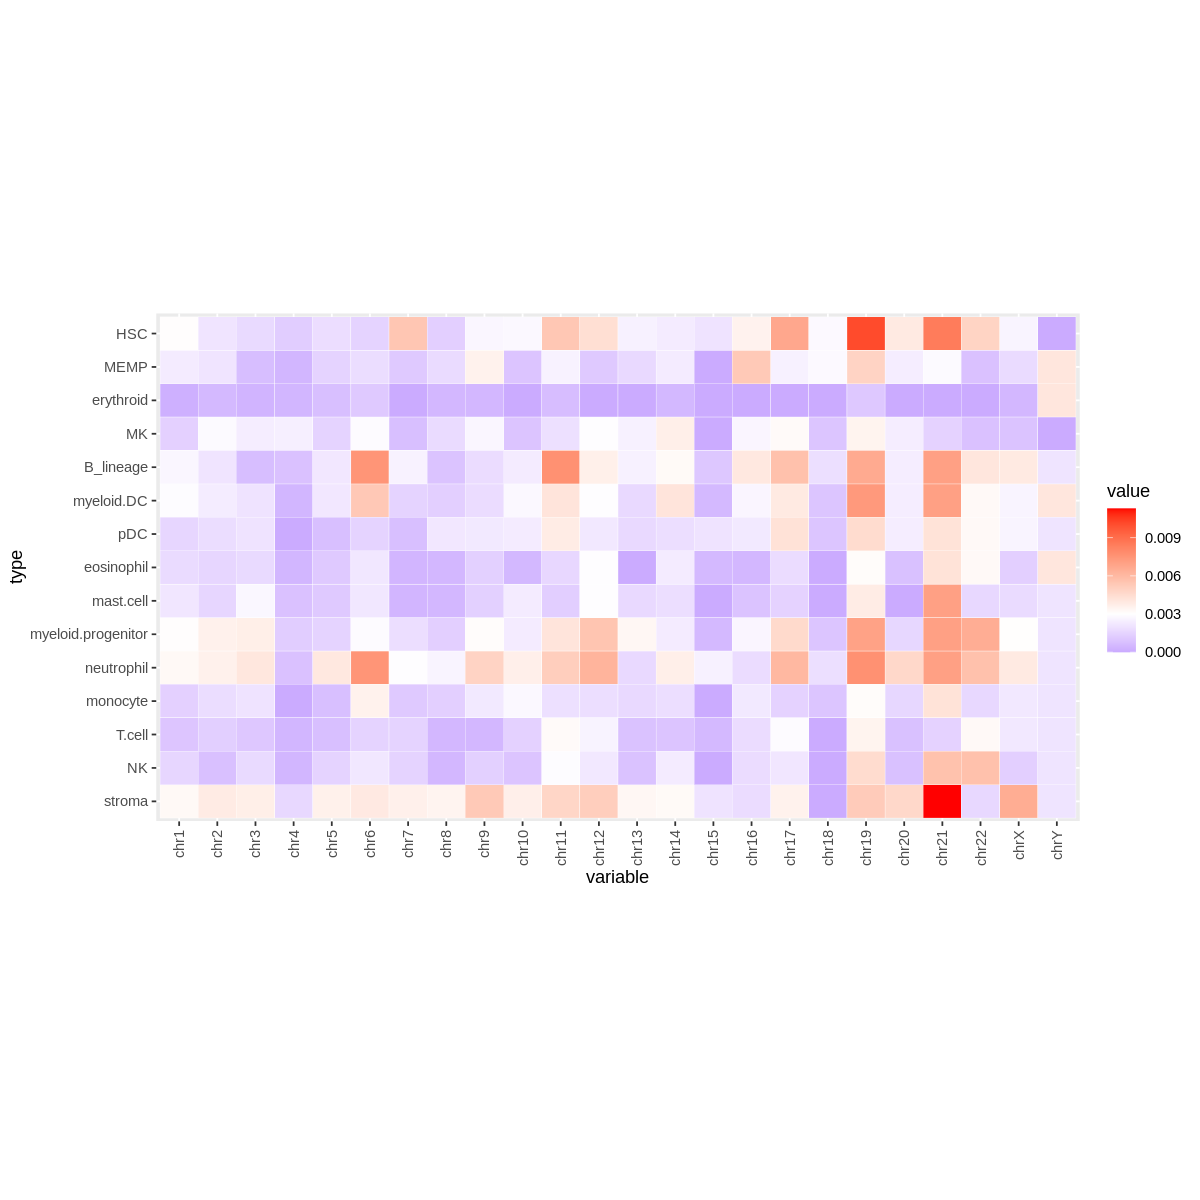

In [488]:
ggplot(df2, aes(type, variable, fill= value)) + 
   geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0.003) + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
coord_flip() + theme(aspect.ratio = 0.55) 

ggsave("DEGs_by_chromosome.pdf", plot = last_plot(), device = NULL, path = NULL,
  scale = 1, dpi = 300)




***Heatmap for 5D***



In [491]:
df<-data.frame(chromosome=levels(order$V2))

In [492]:
Idents(total)<-"clustering_5d"
for(i in unique(total@meta.data$clustering_5d)){
    test<-subset(total, id = i)
    Idents(test)<-"Status"
    markers<-FindAllMarkers(test, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.40)
    markers<-markers[markers$cluster=="downs",]
    markers<-markers[markers$p_val_adj<0.05,]
    asd<-merge(markers, order, by = "gene")
    b<-data.frame(table(asd$V2))
    df$d<-b$Freq
    c<-unique(test@meta.data$clustering_5d)
    names(df)[names(df) == "d"] <- c
    
}

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster

In [493]:
write.csv(df, "chromosomes_5d.csv")

In [496]:
rates<-read.csv("chromosomes_5d.csv", row.names = 2)
rates$X<-NULL
types<-colnames(rates)
rates<-as.data.frame(rates)
rates<-as.data.frame(t(rates))
rates$chrM<-NULL
rates

,chr1,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,⋯,chr22,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chrX,chrY
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
early.erythroid,6,2,2,1,1,4,0,1,2,1,⋯,0,1,1,2,5,0,1,2,1,2
NA.,21,5,16,16,2,8,2,8,18,0,⋯,7,6,2,10,19,8,2,7,11,1
neutrophil,11,6,14,15,3,7,3,7,13,3,⋯,6,10,1,9,12,5,4,10,6,1
CD14.monocyte,10,8,11,10,2,5,1,5,10,0,⋯,2,6,2,6,20,5,4,7,5,0
myeloid.DC,15,6,13,8,2,9,1,6,11,1,⋯,4,6,1,6,15,4,3,4,6,2
pre.B,42,13,26,21,4,9,9,19,24,2,⋯,10,9,8,12,32,14,5,12,13,1
MK,21,4,11,19,3,14,1,13,14,2,⋯,7,15,8,12,14,5,9,10,6,1
early.B,6,3,15,8,2,3,4,6,8,1,⋯,5,3,2,2,5,3,5,2,10,0
promonocyte,24,13,15,12,2,8,3,10,15,1,⋯,5,9,0,8,16,7,5,9,9,1


In [497]:
table(order$V2)


 chr1 chr10 chr11 chr12 chr13 chr14 chr15 chr16 chr17 chr18 chr19  chr2 chr20 
 5200  2175  3125  2721  1193  2162  1999  2253  2810  1076  2863  3882  1273 
chr21 chr22  chr3  chr4  chr5  chr6  chr7  chr8  chr9  chrM  chrX  chrY 
  708  1228  2959  2468  2762  2793  2745  2304  2248    37  2291   490 

In [498]:
rates <- rates %>% mutate(chr1 = chr1 / 5200)
rates <- rates %>% mutate(chr2 = chr2 / 3882)
rates <- rates %>% mutate(chr3 = chr3 / 2959)
rates <- rates %>% mutate(chr4 = chr4 / 2468)
rates <- rates %>% mutate(chr5 = chr5 / 2762)
rates <- rates %>% mutate(chr6 = chr6 / 2793)
rates <- rates %>% mutate(chr7 = chr7 / 2745)
rates <- rates %>% mutate(chr8 = chr8 / 2304)
rates <- rates %>% mutate(chr9 = chr9 / 2248)
rates <- rates %>% mutate(chr10 = chr10 / 2175)
rates <- rates %>% mutate(chr11 = chr11 / 3125)
rates <- rates %>% mutate(chr12 = chr12 / 2721)
rates <- rates %>% mutate(chr13 = chr13 / 1193)
rates <- rates %>% mutate(chr14 = chr14 / 2162)
rates <- rates %>% mutate(chr15 = chr15 / 1999)
rates <- rates %>% mutate(chr16 = chr16 / 2253)
rates <- rates %>% mutate(chr17 = chr17 / 2810)
rates <- rates %>% mutate(chr18 = chr18 / 1076)
rates <- rates %>% mutate(chr19 = chr19 / 2863)
rates <- rates %>% mutate(chr20 = chr20 / 1273)
rates <- rates %>% mutate(chr21 = chr21 / 708)
rates <- rates %>% mutate(chr22 = chr22 / 1228)
rates <- rates %>% mutate(chrX = chrX / 2291)
rates <- rates %>% mutate(chrY = chrY / 490)
rownames(rates)<-types
rates

,chr1,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,⋯,chr22,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chrX,chrY
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
early.erythroid,0.001153846,0.0009195402,0.00064,0.0003675119,0.000838223,0.0018501388,0.0000000000,0.0004438526,0.0007117438,0.000929368,⋯,0.0000000000,0.000337952,0.0004051864,0.0007241130,0.0017901898,0.0000000000,0.0004340278,0.0008896797,0.0004364906,0.004081633
NA.,0.004038462,0.0022988506,0.00512,0.0058801911,0.001676446,0.0037002775,0.0010005003,0.0035508211,0.0064056940,0.000000000,⋯,0.0057003257,0.002027712,0.0008103728,0.0036205648,0.0068027211,0.0029143898,0.0008680556,0.0031138790,0.0048013968,0.002040816
neutrophil,0.002115385,0.0027586207,0.00448,0.0055126792,0.002514669,0.0032377428,0.0015007504,0.0031069685,0.0046263345,0.002788104,⋯,0.0048859935,0.003379520,0.0004051864,0.0032585083,0.0042964554,0.0018214936,0.0017361111,0.0044483986,0.0026189437,0.002040816
CD14.monocyte,0.001923077,0.0036781609,0.00352,0.0036751194,0.001676446,0.0023126735,0.0005002501,0.0022192632,0.0035587189,0.000000000,⋯,0.0016286645,0.002027712,0.0008103728,0.0021723389,0.0071607590,0.0018214936,0.0017361111,0.0031138790,0.0021824531,0.000000000
myeloid.DC,0.002884615,0.0027586207,0.00416,0.0029400956,0.001676446,0.0041628122,0.0005002501,0.0026631158,0.0039145907,0.000929368,⋯,0.0032573290,0.002027712,0.0004051864,0.0021723389,0.0053705693,0.0014571949,0.0013020833,0.0017793594,0.0026189437,0.004081633
pre.B,0.008076923,0.0059770115,0.00832,0.0077177508,0.003352892,0.0041628122,0.0045022511,0.0084332002,0.0085409253,0.001858736,⋯,0.0081433225,0.003041568,0.0032414911,0.0043446778,0.0114572145,0.0051001821,0.0021701389,0.0053380783,0.0056743780,0.002040816
MK,0.004038462,0.0018390805,0.00352,0.0069827269,0.002514669,0.0064754857,0.0005002501,0.0057700843,0.0049822064,0.001858736,⋯,0.0057003257,0.005069280,0.0032414911,0.0043446778,0.0050125313,0.0018214936,0.0039062500,0.0044483986,0.0026189437,0.002040816
early.B,0.001153846,0.0013793103,0.00480,0.0029400956,0.001676446,0.0013876041,0.0020010005,0.0026631158,0.0028469751,0.000929368,⋯,0.0040716612,0.001013856,0.0008103728,0.0007241130,0.0017901898,0.0010928962,0.0021701389,0.0008896797,0.0043649062,0.000000000
promonocyte,0.004615385,0.0059770115,0.00480,0.0044101433,0.001676446,0.0037002775,0.0015007504,0.0044385264,0.0053380783,0.000929368,⋯,0.0040716612,0.003041568,0.0000000000,0.0028964518,0.0057286072,0.0025500911,0.0021701389,0.0040035587,0.0039284155,0.002040816


In [499]:
rates$type<-rownames(rates)
df2<-melt(rates, id = c("type"))

Saving 6.67 x 6.67 in image



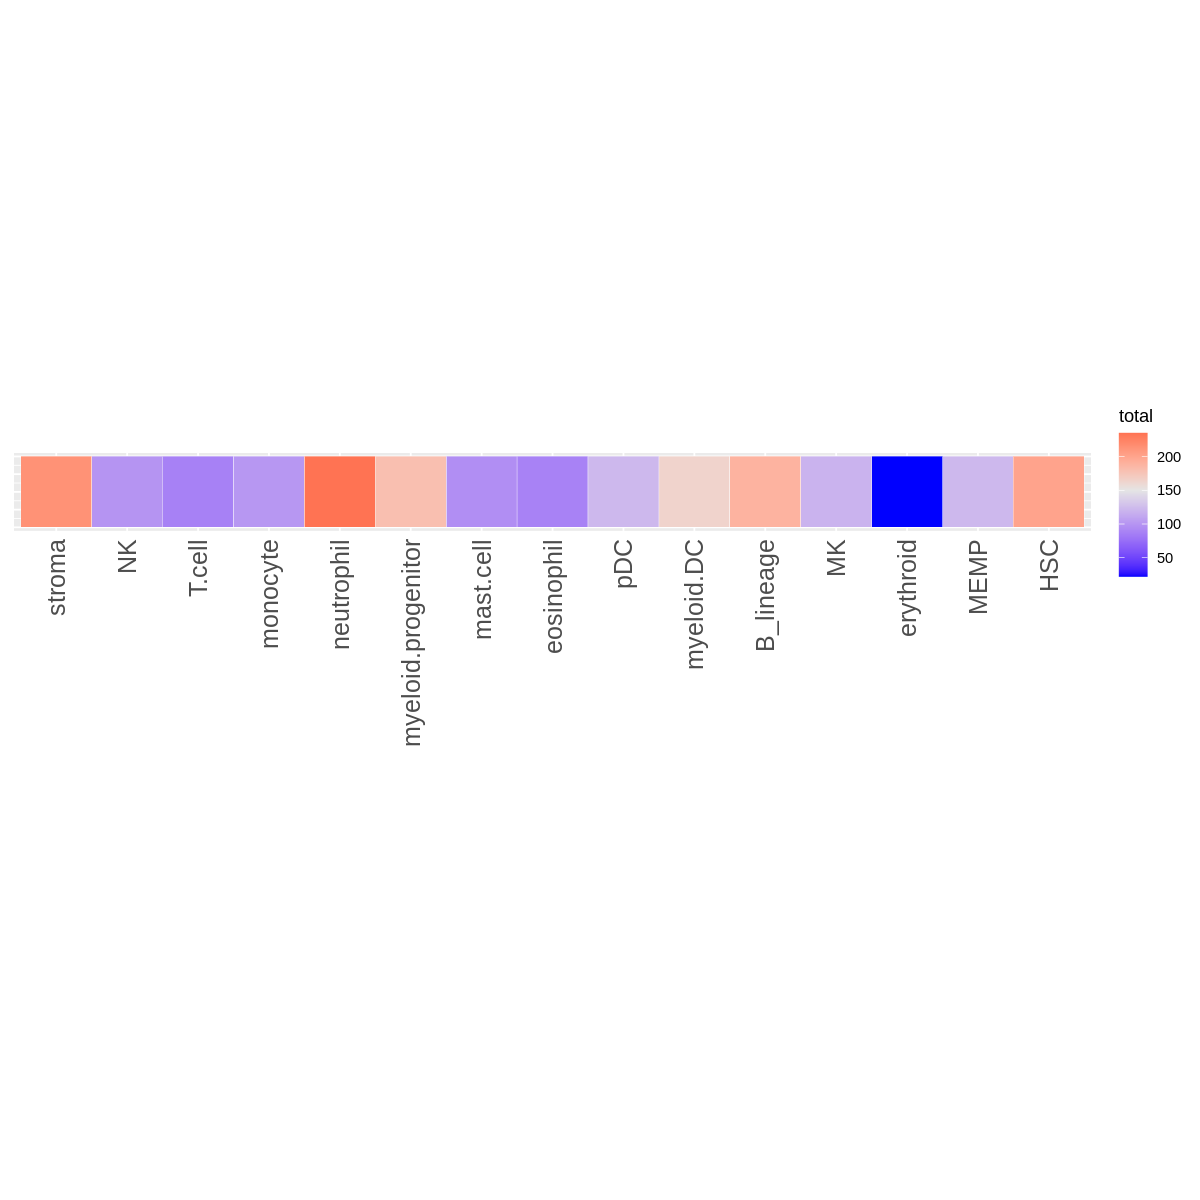

In [500]:

###Heatmap of DEG totals
rates<-read.csv("chromosomes.csv", row.names = 2)
rates$X<-NULL
rates$Stroma<-NULL
df<-data.frame(colSums(rates))
colnames(df)<-"total"
df$celltype<-row.names(df)

df$celltype<-as.factor(df$celltype)
df$celltype <- factor(df$celltype, levels = rev(c("HSC", "MEMP", "erythroid", "MK", "B_lineage", "myeloid.DC", 
                                      "pDC", "eosinophil", "mast.cell", "myeloid.progenitor",
                                      "neutrophil", "monocyte", "T.cell", "NK", "stroma")))

ggplot(df, aes(celltype, 1, fill= total)) + 
   geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "grey90", midpoint = 150) + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
coord_fixed() +
  theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank())+
  theme(axis.title.x=element_blank(),
        axis.text.x=element_text(size = 15, angle = 90),
        axis.ticks.x=element_blank())

ggsave("total_DEGs_by_chromosome.pdf", plot = last_plot(), device = NULL, path = NULL,
  scale = 1, dpi = 300)




***Generate list of DEGs for each subset***



In [21]:
total@meta.data$clustering_5c[total@meta.data$clustering_5c== "myeloid DC"] <- "myeloid_DC"
total@meta.data$clustering_5c[total@meta.data$clustering_5c== "mast cell"] <- "mast_cell"
total@meta.data$clustering_5c[total@meta.data$clustering_5c== "T cell"] <- "T_cell"
total@meta.data$clustering_5c[total@meta.data$clustering_5c== "myeloid progenitor"] <- "myeloid_progenitor"

In [22]:
total@meta.data$clustering_5d[total@meta.data$clustering_5d== "CD14 monocyte"] <- "monocyte"
total@meta.data$clustering_5d[total@meta.data$clustering_5d== "CMP/GMP"] <- "CMP_GMP"
total@meta.data$clustering_5d[total@meta.data$clustering_5d== "early B"] <- "early_B"
total@meta.data$clustering_5d[total@meta.data$clustering_5d== "early erythroid"] <- "early_erythroid"
total@meta.data$clustering_5d[total@meta.data$clustering_5d== "early MK"] <- "early_MK"
total@meta.data$clustering_5d[total@meta.data$clustering_5d== "eo/baso/mast precursor"] <- "eo_baso_mast_precursor"
total@meta.data$clustering_5d[total@meta.data$clustering_5d== "HSC/MPP"] <- "HSC_MPP"
total@meta.data$clustering_5d[total@meta.data$clustering_5d== "late erythroid"] <- "late_erythroid"
total@meta.data$clustering_5d[total@meta.data$clustering_5d== "mast cell"] <- "mast_cell"
total@meta.data$clustering_5d[total@meta.data$clustering_5d== "mature B"] <- "mature_B"
total@meta.data$clustering_5d[total@meta.data$clustering_5d== "mid erythroid"] <- "mid_erythroid"
total@meta.data$clustering_5d[total@meta.data$clustering_5d== "myeloid DC"] <- "myeloid_DC"
total@meta.data$clustering_5d[total@meta.data$clustering_5d== "pre B"] <- "pre_B"

In [23]:
datalist<-list()
clusterlist<-list()

In [24]:
Idents(total)<-"clustering_5c"

for(i in unique(total@meta.data$clustering_5c)){
    test<-subset(total, id = i)
    Idents(test)<-"Status"
    markers<-FindAllMarkers(test, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
    markers<-markers[markers$p_val_adj<0.05,]
    markers$gene<-rownames(markers)
    colnames(markers)<-c(paste0("p_val", "_", i), paste0("avg_logFC", "_", i), 
                     paste0("pct_1", "_", i), paste0("pct_2", "_", i), 
                     paste0("p_val_adj", "_", i), paste0("Status", "_", i))
    dat<-assign(paste0("DEGs", "_", i), select(markers, 2, 5, 6))
    g<-match(i,unique(total@meta.data$clustering_5c))
    clusterlist[g]<-paste0("DEGs", "_", i)
    datalist[[g]] <- dat   
}

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs



In [25]:
setwd("/home/jovyan/data/bone_marrow/data")
for(i in 1:length(datalist)){
  write.csv(datalist[[i]], paste(clusterlist[i], "_DEGs.txt", sep = ""))
}

In [ ]:



***Limit to TFs***

###http://www.valleyofpigs.org/humantfs

In [441]:
order<-read.csv('gencode_v19_gene_pos.txt', sep = '\t', header = FALSE, row.names = 1)
order$gene<-rownames(order)

In [442]:
TFs<-read.csv("nrg2538-s3.txt", sep = '\t')
TFs<-TFs[c("Ensembl.ID", "HGNC.symbol")]
colnames(TFs)<-c("Ensembl", "gene")

TFs<-merge(TFs, order, by = "gene")
TFs<-TFs[c("gene", "V2")]
colnames(TFs)<-c("gene", "chromosome")


In [6]:
total<-readRDS("total.RDS")
total_TF<-total[TFs$gene,]

In [443]:
total_TF<-total[TFs$gene,]

In [48]:
df<-data.frame(chromosome=levels(order$V2))

In [49]:
for(i in unique(total_TF@meta.data$clustering)){
    test<-subset(total_TF, id = i)
    Idents(test)<-"Status"
    markers<-FindAllMarkers(test, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
    markers<-markers[markers$cluster=="downs",]
    markers<-markers[markers$p_val_adj<0.05,]
    asd<-merge(markers, order, by = "gene")
    b<-data.frame(table(asd$V2))
    df$d<-b$Freq
    c<-unique(test@meta.data$clustering)
    names(df)[names(df) == "d"] <- c
    
}

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs

Calculating cluster healthy

Calculating cluster downs



In [51]:
tf_df<-df
chromosomes<-df$chromosome
df$chromosome<-NULL
rates<-as.data.frame(t(df))
colnames(rates)<-chromosomes
head(rates)

rates <- rates %>% mutate(chr1 = chr1 / 5000)
rates <- rates %>% mutate(chr2 = chr2 / 3882)
rates <- rates %>% mutate(chr3 = chr3 / 2959)
rates <- rates %>% mutate(chr4 = chr4 / 2468)
rates <- rates %>% mutate(chr5 = chr5 / 2762)
rates <- rates %>% mutate(chr6 = chr6 / 2793)
rates <- rates %>% mutate(chr7 = chr7 / 2745)
rates <- rates %>% mutate(chr8 = chr8 / 2304)
rates <- rates %>% mutate(chr9 = chr9 / 2248)
rates <- rates %>% mutate(chr10 = chr10 / 2175)
rates <- rates %>% mutate(chr11 = chr11 / 3125)
rates <- rates %>% mutate(chr12 = chr12 / 2721)
rates <- rates %>% mutate(chr13 = chr13 / 1193)
rates <- rates %>% mutate(chr14 = chr14 / 2162)
rates <- rates %>% mutate(chr15 = chr15 / 1999)
rates <- rates %>% mutate(chr16 = chr16 / 2253)
rates <- rates %>% mutate(chr17 = chr17 / 2810)
rates <- rates %>% mutate(chr18 = chr18 / 1076)
rates <- rates %>% mutate(chr19 = chr19 / 2863)
rates <- rates %>% mutate(chr20 = chr20 / 1273)
rates <- rates %>% mutate(chr21 = chr21 / 708)
rates <- rates %>% mutate(chr22 = chr22 / 1228)
rates <- rates %>% mutate(chrM = chrM / 37)
rates <- rates %>% mutate(chrX = chrX / 2291)
rates <- rates %>% mutate(chrY = chrY / 490)

rownames(rates)<-colnames(df)

rates$chrX<-NULL
rates$chrY<-NULL
rates$chrM<-NULL
rates$types<-rownames(rates)

df2<-melt(rates, id = c("types"))


options(repr.plot.width=10, repr.plot.height=10)

df2$types<-as.factor(df2$types)
df2$types <- factor(df2$types, levels = c("Eosinophil", "Mast_cell",
                                        "NK", "B_lineage", "pDC", "Stroma",
                                        "T_cell","HSC", "Erythroid", "Monocyte",
                                        "Neutrophil", "Myeloid_precursor",
                                        "Myeloid_DC", "MEMP", "MK"))


df2$variable <- factor(df2$variable, levels = rev(c("chr1", "chr2", "chr3", "chr4",
                                              "chr5", "chr6", "chr7", "chr8",
                                              "chr9", "chr10", "chr11", "chr12", "chr13", "chr14", "chr15", "chr16", "chr17", "chr18", "chr19", 
                                              "chr20", "chr21", "chr22")))




Saving 6.67 x 6.67 in image



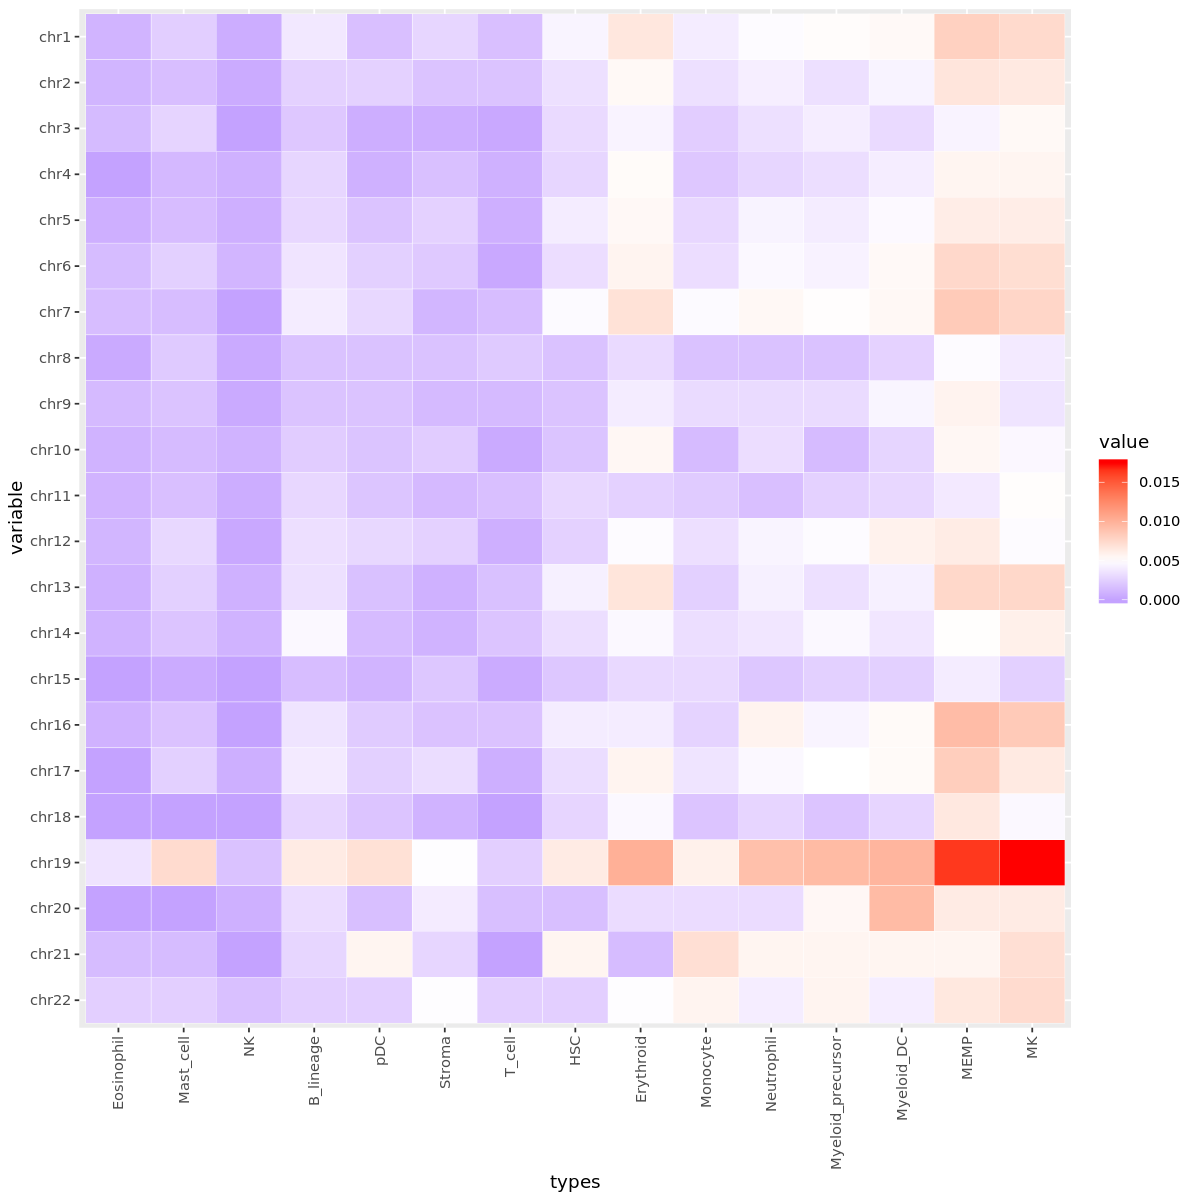

In [91]:
setwd("~/bone_marrow/figures")

ggplot(df2, aes(types, variable, fill= value)) + 
   geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0.005)+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

ggsave("TFs_only.pdf", plot = last_plot(), device = NULL, path = NULL,
  scale = 1, dpi = 300)



***Differentially expressed TFs***




In [58]:
order<-read.csv('gencode_v19_gene_pos.txt', sep = '\t', header = FALSE, row.names = 1)
order$gene<-rownames(order)

In [59]:
TFs<-read.csv("nrg2538-s3.txt", sep = '\t')
TFs<-TFs[c("Ensembl.ID", "HGNC.symbol")]
colnames(TFs)<-c("Ensembl", "gene")

TFs<-merge(TFs, order, by = "gene")
TFs<-TFs[c("gene", "V2")]
colnames(TFs)<-c("gene", "chromosome")


In [36]:
total<-readRDS("total.RDS")


In [60]:
total_TF<-total[TFs$gene,]

In [74]:
df<-data.frame(genes = TFs$gene)

In [78]:
Idents(total_TF)<-"clustering_5c"
total_TF<-subset(total_TF, id = c("lymphoid progenitor", "basophil"), invert = TRUE)

In [81]:
Idents(total_TF)<-"clustering_5c"

for(i in unique(total_TF@meta.data$clustering_5c)){
    test<-subset(total_TF, id = i)
    Idents(test)<-"Status"
    markers<-FindMarkers(test, ident.1 = "downs", only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
    markers<-markers[markers$p_val_adj<0.05,]
    markers$gene<-rownames(markers)
    assign(paste0("DEGs", "_", i), as.data.frame(markers$gene))
    
}

In [93]:
g<-list(B_cells = DEGs_B_lineage$"markers$gene", 
        Eosinophils = DEGs_eosinophil$"markers$gene", 
        Erythroid = DEGs_erythroid$"markers$gene", 
        HSC = DEGs_HSC$"markers$gene", 
        Mast_cell = `DEGs_mast cell`$"markers$gene", 
        MEMP = DEGs_MEMP$"markers$gene",
        MK = DEGs_MK$"markers$gene", 
        Monocyte = DEGs_monocyte$"markers$gene", 
        Myeloid_DC = `DEGs_myeloid DC`$"markers$gene", 
        Myeloid_precursor = `DEGs_myeloid progenitor`$"markers$gene", 
        Neutrophil = DEGs_neutrophil$"markers$gene", 
        NK = DEGs_NK$"markers$gene",
        pDC = DEGs_pDC$"markers$gene", 
        Stroma = DEGs_stroma$"markers$gene", 
        T_cell=`DEGs_T cell`$"markers$gene", 
        HSC=DEGs_HSC$"markers$gene")


In [94]:
chr_21_tfs<-c("AIRE", "BACH1", "ERG", "ETS2", "GABPA", "OLIG1", "OLIG2", "PKNOX1", "PRDM15", "RUNX1", "SIM2", "U2AF1")

In [95]:
g$B_cells[g$B_cells %in% chr_21_tfs]

[1] ETS2
24 Levels: C17orf49 DNAJC1 DUS3L ETS2 EWSR1 FOS FOSB HMGA1 INF2 IRF7 ... ZFP36L1

In [96]:
g$Eosinophils[g$Eosinophils %in% chr_21_tfs]

[1] RUNX1
23 Levels: AFF4 EGR1 FOS FOSB HIST1H1E JUN JUNB KLF4 KLF6 MAFF NFKB2 ... ZNF804A

In [97]:
g$Erythroid[g$Erythroid %in% chr_21_tfs]

factor(0)
Levels: EGR1 FOS FOSB JUN JUNB SP100

In [98]:
g$HSC[g$HSC %in% chr_21_tfs]

[1] RUNX1
37 Levels: AHR ATF3 ATF5 C17orf49 DUS3L EGR1 EWSR1 FOS FOSB FOSL1 ... ZFP36L1

In [99]:
g$Mast_cell[g$Mast_cell %in% chr_21_tfs]

factor(0)
31 Levels: AFF4 AHR ATF5 C17orf49 EGR1 EWSR1 FOS FOSB HIST1H1C ... ZFP36L1

In [100]:
g$MEMP[g$MEMP %in% chr_21_tfs]

factor(0)
22 Levels: ATF5 BOLA3 CARHSP1 CD36 EGR1 FOS FOSB FOXH1 GFI1B HIF3A ... ZFP36L1

In [101]:
g$MK[g$MK %in% chr_21_tfs]

factor(0)
26 Levels: ATF3 ATF5 BCLAF1 C17orf49 EGR1 EWSR1 FARSB FOS FOSB HMGA1 ... ZFP36L2

In [102]:
g$Monocyte[g$Monocyte %in% chr_21_tfs]

[1] ETS2
26 Levels: AHR ATF4 EGR1 ETS2 FOS FOSB ID1 ID2 JUN JUNB JUND KLF10 ... ZNF385A

In [103]:
g$Myeloid_DC[g$Myeloid_DC %in% chr_21_tfs]

factor(0)
35 Levels: AHR ATF3 CD36 CREB5 EGR1 FOS FOSB HLA-DQB1 HLA-DQB2 ID1 ID2 ... ZNF385A

In [104]:
g$Myeloid_precursor[g$Myeloid_precursor %in% chr_21_tfs]

[1] ETS2  RUNX1
43 Levels: ATF4 ATF5 BCLAF1 C17orf49 CSDE1 DRAP1 DUS3L EGR1 ETS2 EWSR1 ... ZFP36L1

In [105]:
g$Neutrophil[g$Neutrophil %in% chr_21_tfs]

factor(0)
39 Levels: AHR ATF3 C17orf49 CD36 EGR1 EIF3K EWSR1 FOS FOSB HIST1H1E ... ZNF593

In [106]:
g$NK[g$NK %in% chr_21_tfs]

factor(0)
20 Levels: C17orf49 EGR1 EOMES EWSR1 FOS FOSB HIST1H1E JUN JUNB KLF10 ... ZFP36L1

In [107]:
g$pDC[g$pDC %in% chr_21_tfs]

factor(0)
22 Levels: ATF3 C17orf49 DUS3L EWSR1 FOS FOSB ID1 IRF7 JUN KLF10 KLF4 ... ZNF791

In [108]:
g$Stroma[g$Stroma %in% chr_21_tfs]

[1] RUNX1 ETS2 
38 Levels: AFF3 AFF4 ATF5 CREB5 EGR1 ETS2 FOS FOSB HP1BP3 JUN JUNB ... ZNF503

In [109]:
g$T_cell[g$T_cell %in% chr_21_tfs]

factor(0)
16 Levels: ATF5 CHRAC1 EWSR1 FOS HMGA1 JUN JUNB KLF10 KLF6 MEOX1 ... ZFP36L2

In [110]:
a<-data.frame(genes = c("AIRE", "BACH1", "ERG", "ETS2", "GABPA", "OLIG1", "OLIG2", "PKNOX1", "PRDM15", "RUNX1", "SIM2", "U2AF1"),
              NK =         c(0,0,0,0,0,0,0,0,0,0,0,0),
              T_cell =     c(0,0,0,0,0,0,0,0,0,0,0,0),
              Monocyte =   c(0,0,0,1,0,0,0,0,0,0,0,0),
              Neutrophil = c(0,0,0,0,0,0,0,0,0,-1,0,0),
              Myeloid_pre= c(0,0,0,1,0,0,0,0,0,0,0,-1),
              Mast_cell =  c(0,0,0,0,0,0,0,0,0,0,0,0),
              Eosinophils= c(0,0,0,0,0,0,0,0,0,-1,0,0),
              pDC =        c(0,0,0,0,0,0,0,0,0,0,0,0),
              Myeloid_DC = c(0,0,0,0,0,0,0,0,0,0,0,0),
              B_cells =    c(0,0,0,1,0,0,0,0,0,0,0,0),
              MK =         c(0,0,0,0,0,0,0,0,0,0,0,0),
              Erythroid =  c(0,0,0,0,0,0,0,0,0,0,0,0),
              MEMP =       c(0,0,0,0,0,0,0,0,0,0,0,0),
              HSC =        c(0,0,0,0,0,0,0,0,0,1,0,0)
              )

In [111]:
rownames(a)<-a$genes
a$genes<-NULL

Saving 6.67 x 6.67 in image



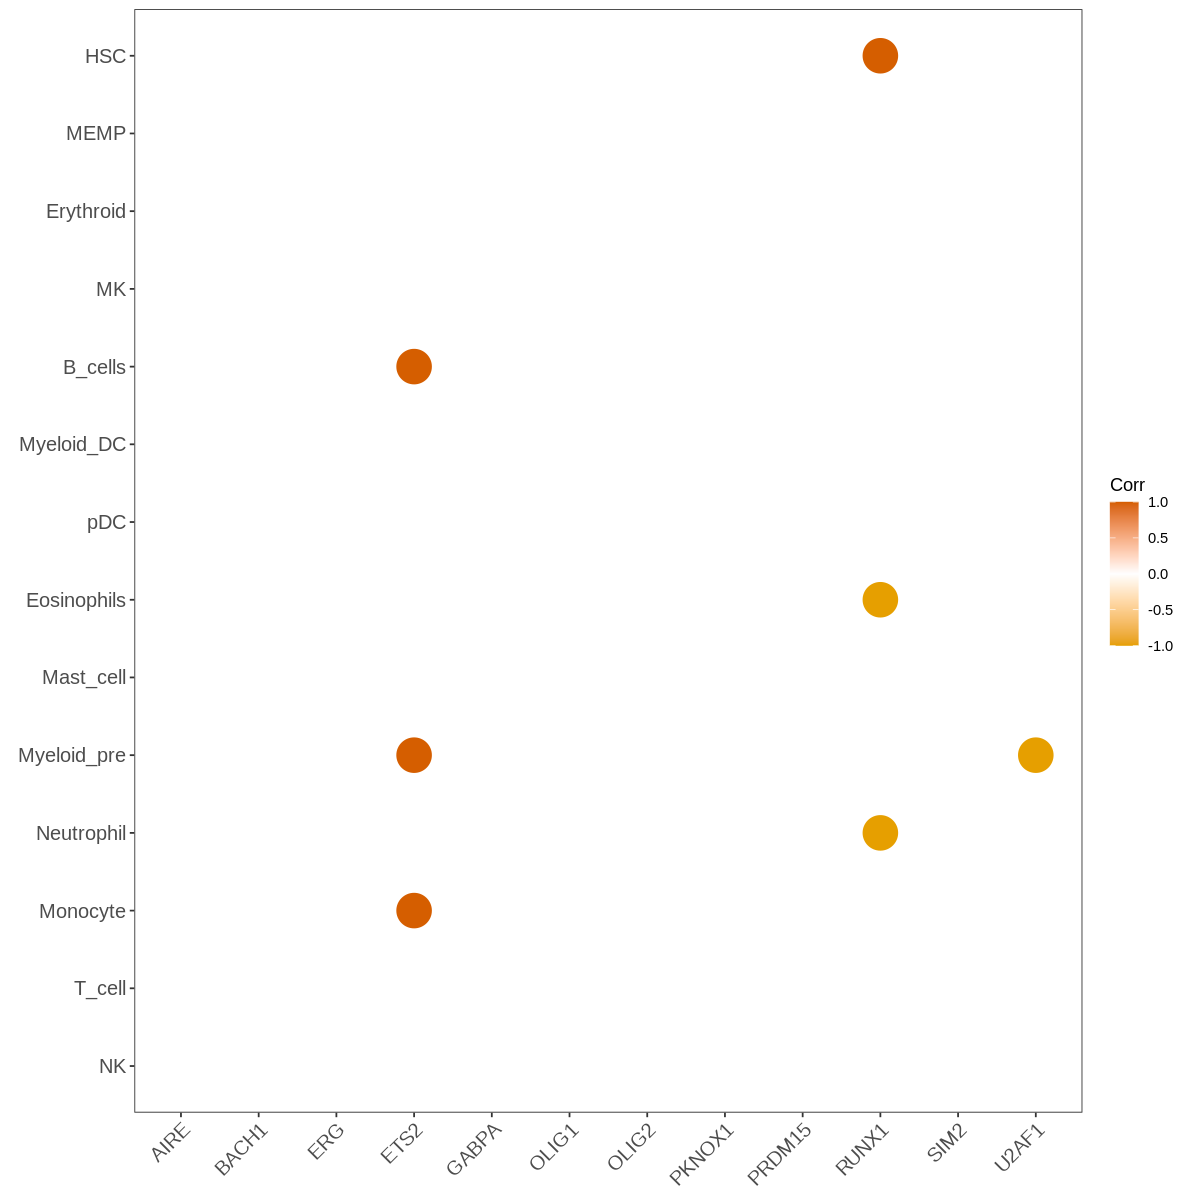

In [112]:
ggcorrplot(a, method = "circle", outline.col = "white",
   ggtheme = ggplot2::theme_bw(),
   colors = c("#E69F00", "white", "#D55E00"))+ theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank())

ggsave("Sig_TFs_plot.pdf", plot = last_plot(), device = NULL, path = NULL,
  scale = 1, dpi = 300)

In [9]:
runx1_genes<-c("GPSM3", 	"RASGRP3", 	"LCP2", 	"LAT", 	"RIN3", 	"PIK3R5", 	"ITGA2B", 	"DOCK10", 	"EVA1B", 	"MARK2", 	"ARHGAP27", 	"FERMT3", 	"PTPN7", 	"RGS14", 	"IKBKB", 	"SLC22A15", 	"PIK3CD", 	"SH3BP2", 	"PRKACB", 	"CYTL1", 	"HCLS1", 	"CCDC9", 	"ITGAL", 	"PRICKLE1", 	"RRP12", 	"S100A9", 	"NLRC3", 	"MAPRE2", 	"KLHL6", 	"ETF1", 	"LST1", 	"C12orf75", 	"TFPI", 	"ZFC3H1", 	"FMNL1", 	"CD200R1", 	"SPNS3", 	"FCER1G", 	"MAP3K11", 	"GPR65", 	"MMRN1", 	"CCDC88B", 	"FBRSL1", 	"GBA", 	"GAB3", 	"KIF3B", 	"TLR4", 	"CSK", 	"VAV1", 	"SPI1", 	"CXCR3", 	"TLN1", 	"ITGB2", 	"PKN1", 	"NFKB1", 	"ARHGAP9", 	"NEDD4", 	"ALOX5AP", 	"SERPINA1", 	"TAGAP", 	"ACAP2", 	"NCF4", 	"TRERF1", 	"TMC8", 	"ICAM3", 	"TIE1", 	"STXBP5", 	"CCM2", 	"IL11RA", 	"SYTL3", 	"BIN3", 	"PHLDB3", 	"CTSG", 	"C1orf54", 	"PLEKHG3", 	"PDE4D", 	"TNNI2", 	"C1QC", 	"PDE1B", 	"LIMS1", 	"CTBP2", 	"PTPN6", 	"FAM102B", 	"ANXA4", 	"VGLL4", 	"KDM2A", 	"DPY19L3", 	"AAK1", 	"HK3", 	"TMEM156", 	"MIR155HG", 	"PIK3AP1", 	"NCOA7", 	"CSF2RB", 	"TBC1D10C", 	"MS4A7", 	"TRPC4AP", 	"ADGRG3", 	"LILRB5", 	"SLC9A3R1", 	"NOTCH2", 	"ANGPT2", 	"MYCT1", 	"PTPRJ", 	"RASSF5", 	"TRAF3IP3", 	"HMHA1", 	"RAE1", 	"PTPRE", 	"PLCB2", 	"MLLT10", 	"NPTN", 	"NAV3", 	"FBXO11", 	"ARFGEF1", 	"ZADH2", 	"CLEC10A", 	"FUT7", 	"PIKFYVE", 	"P2RX1", 	"RAB32", 	"BRWD3", 	"CLNK", 	"GAPT", 	"HPCAL1", 	"CLEC1B", 	"IGF1", 	"WIPF1", 	"VCPIP1", 	"E2F3", 	"CD68", 	"TBXAS1", 	"GCNT1", 	"DEPDC5", 	"JAK2", 	"IKZF2", 	"TRAPPC11", 	"PPP1R9A", 	"PRTN3", 	"C19orf25", 	"C1QTNF4", 	"B9D2", 	"TRAT1", 	"EGFL7", 	"RPS6KA3", 	"UBN2", 	"AKNA", 	"RPS17", 	"LTC4S", 	"FBXW7", 	"WDFY4", 	"ZBTB37", 	"SPX", 	"MGAT1", 	"FAM129A", 	"TBC1D1", 	"RAP1GAP2", 	"RELT", 	"TPSB2", 	"FCGR2B", 	"ELMO1", 	"UBE2Q1", 	"VPS39", 	"CTDSP1", 	"PRAM1", 	"NRBF2", 	"DGKZ", 	"EXOC1", 	"GP1BA", 	"HMBOX1", 	"SLC25A24", 	"CD63", 	"PLD4", 	"SMG7", 	"ICA1", 	"CARD6", 	"FAM91A1", 	"CCL2", 	"WAS", 	"TPSAB1", 	"CMIP", 	"DPP8", 	"STK4", 	"PPP1R21", 	"DST", 	"ZNF333", 	"FAM63B", 	"CD14", 	"FUT4", 	"HOMER3", 	"CALCRL", 	"TMEM185B", 	"APOBR", 	"MSRA", 	"DENND1B", 	"MGAT5", 	"ACBD3", 	"NLK", 	"NCF1", 	"RUNX1", 	"TUG1", 	"PACSIN2", 	"PTPRCAP", 	"ITM2C", 	"GDPD3", 	"LINC01089", 	"TRIM44", 	"DYNLL2", 	"ELF4", 	"PGRMC1", 	"S100A4", 	"MFN1", 	"TPSD1", 	"KIAA0141", 	"AP1G1", 	"SP140L", 	"CDK9", 	"TNPO3", 	"NR2C2", 	"KDM5C", 	"ARHGEF6", 	"TMEM33", 	"UBASH3B", 	"MRC1", 	"MRVI1", 	"GMIP", 	"VEZF1", 	"GTF3C1", 	"SLC35D2", 	"SLC16A3", 	"38961", 	"NLRP12", 	"TRIM41", 	"NLRP3", 	"YTHDF3", 	"PECAM1", 	"LRMP", 	"CCL4L2", 	"BRD9", 	"BANK1", 	"LINC01013", 	"RAB3C", 	"ADGRG1", 	"CYTH4", 	"CCDC93", 	"CMTM5", 	"SIGLEC14", 	"TMEM40", 	"CC2D1B", 	"NKG7", 	"HGF", 	"MSL2", 	"PTGS1", 	"WDTC1", 	"CHD7", 	"SEPP1", 	"THUMPD3-AS1", 	"STAT5B", 	"C16orf54", 	"MLC1", 	"TAGLN2", 	"PRSS57", 	"IGFBP7", 	"MACF1", 	"CLEC11A", 	"PLEK", 	"GCSAML", 	"PLAC8", 	"CCND2", 	"MANF", 	"LAIR1", 	"YPEL2", 	"ANKRD28", 	"PIK3R6", 	"CRNKL1", 	"DEF6", 	"FAR2", 	"ERMP1", 	"SNX14", 	"BICD2", 	"ZNF804A", 	"PSTPIP1", 	"ARPP21", 	"MYO1F", 	"SAMSN1", 	"CFP", 	"SLC7A7", 	"LINC01272", 	"CD79B", 	"SH3BP5L", 	"AMPD3", 	"FZR1", 	"CACNB4", 	"LLGL2", 	"CAB39", 	"ZBTB6", 	"MPZL3", 	"TRAPPC6B", 	"GPD2", 	"RGL2", 	"RAP2C", 	"DNAJC1", 	"ABHD17A", 	"EXOC3", 	"ZBTB11", 	"CSNK1G1", 	"SENP7", 	"MANBAL", 	"MTFR1L", 	"GBA2", 	"KANSL1", 	"CRK", 	"GPAA1", 	"INTS1", 	"DHX34", 	"INTS3", 	"UBE2M", 	"CCDC174", 	"ZNF274", 	"VPS53", 	"PSEN1", 	"IL2RG", 	"WDR37", 	"TCOF1", 	"NF1", 	"AP1S2", 	"ARID3B", 	"FHL3", 	"ADAM17", 	"STAB1", 	"RETN", 	"USE1", 	"C1QB", 	"FCHSD2", 	"DISP1", 	"EXTL3", 	"MAPK8IP3", 	"ZNF655", 	"INSIG2", 	"FBXO38", 	"LEPROTL1", 	"FES", 	"NRP1", 	"ARHGAP6", 	"SLC30A6", 	"PRKAR1A", 	"SH2D4B", 	"IMPA1", 	"EDEM3", 	"ZKSCAN1", 	"NSUN6", 	"ZNF518A", 	"MIDN", 	"FAM174A", 	"ARPC4", 	"EDEM1", 	"TAF1", 	"USP4", 	"PTK2B", 	"FAM207A", 	"GALNT7", 	"XPO6")






***Export subset of data with harmony corrected PCAs***



In [3]:
setwd("~/bone_marrow")
bm<-readRDS("bm.RDS")

In [437]:
unique(bm@meta.data$cell.labels)

ERROR: Error in unique(bm@meta.data$cell.labels): object 'bm' not found


In [32]:
Idents(bm)<-"cell.labels"
bm<-subset(bm, id = c("DC precursor", "DC1", "DC2", "DC3", "tDC", "pDC",
                     "myeloid DC progenitor", "DC precursor", "MPP myeloid 2", "MPP myeloid 1",
                     "HSC", "CMP", "GMP"))

In [33]:
bm <- NormalizeData(bm, normalization.method = "LogNormalize", scale.factor = 10000)
bm <- FindVariableFeatures(bm, selection.method = "vst", nfeatures = 2000)

In [34]:
all.genes <- rownames(bm)
bm <- ScaleData(bm, features = all.genes)

Centering and scaling data matrix



In [35]:
bm <- RunPCA(bm, features = VariableFeatures(object = bm))

PC_ 1 
Positive:  CST3, ACTB, TMSB10, ANXA2, VIM, HLA-B, CALM1, PFN1, S100A10, EMP3 
	   CD74, S100A6, SAMHD1, SH3BGRL3, S100A11, CFL1, CTSH, ANXA5, HLA-DRB5, HLA-DPA1 
	   CORO1A, FCER1G, CAPG, S100A4, CLEC10A, HLA-DRB1, HLA-C, CFP, ANXA1, HLA-DRA 
Negative:  PRSS57, EGFL7, SMIM24, RPL7, RP11-620J15.3, MPO, RPL13A, RPL26, HBG2, MYB 
	   RPS17, ITM2A, NUCB2, HBA1, RPS10, PRTN3, DLK1, RPS20, MS4A3, RPS2 
	   TRH, RPL27A, AZU1, HBA2, RPL22L1, SPINK2, NGFRAP1, CLEC11A, CD34, MYC 
PC_ 2 
Positive:  JCHAIN, IRF7, UGCG, IL3RA, LILRA4, TPM2, FAM129C, MZB1, SERPINF1, TCF4 
	   CLEC4C, CCDC50, IRF8, HERPUD1, ITM2C, IGKC, BLNK, NCF1, SIT1, ST6GALNAC4 
	   GZMB, CYTH4, SPIB, SMPD3, TNFRSF21, DERL3, APP, ALOX5AP, CCDC186, BTG2 
Negative:  TPI1, GAPDH, RNASE2, LYZ, TSPO, GSTP1, SPI1, HSPD1, H2AFZ, IGFBP7 
	   CSTA, TUBA1B, MNDA, TIMP1, FAM46A, CSF3R, RETN, HSPB1, COTL1, ALDOA 
	   HMGB2, TESC, RANBP1, NFE2, NME1, CLEC11A, HSP90AA1, IMPDH2, MPO, SERPINB1 
PC_ 3 
Positive:  FTL, TSPO, TYMP, S100A4, S

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


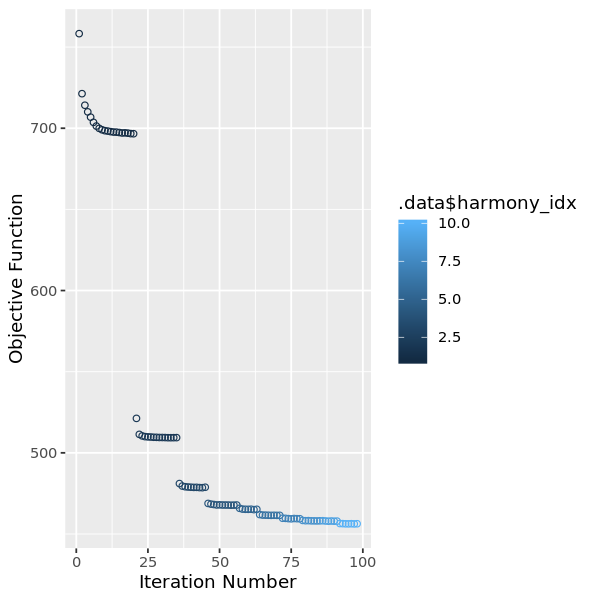

In [36]:
bm <- RunHarmony(bm, "lanes", plot_convergence = TRUE)

In [37]:
embed<-Embeddings(object = bm, reduction = "harmony")
write.csv(embed, "embed.csv")
load<-Loadings(object = bm, reduction = "harmony")
write.csv(load, "loadings.csv")

In [38]:
###Export data from Seurat

data<-GetAssayData(object = bm, slot = "counts")
writeMM(data, "dc.mtx")
write.csv(data.frame(rownames(bm)), "dc_genes.csv")
write.csv(data.frame(colnames(bm)), "dc_cells.csv")
write.csv(bm@meta.data, "dc_meta.csv")

NULL



***Volcano plot***



In [46]:
HSC<-subset(total, id = "HSC")

In [47]:
Idents(HSC)<-"Status"
markers<-FindMarkers(HSC, ident.1 = "downs", only.pos = FALSE, min.pct = 0.01)

In [48]:
threshold <- markers$p_val_adj > 0.05

In [49]:
markers$threshold <- threshold

In [50]:
runx1_genes<-c("GPSM3", 	"RASGRP3", 	"LCP2", 	"LAT", 	"RIN3", 	"PIK3R5", 	"ITGA2B", 	"DOCK10", 	"EVA1B", 	"MARK2", 	"ARHGAP27", 	"FERMT3", 	"PTPN7", 	"RGS14", 	"IKBKB", 	"SLC22A15", 	"PIK3CD", 	"SH3BP2", 	"PRKACB", 	"CYTL1", 	"HCLS1", 	"CCDC9", 	"ITGAL", 	"PRICKLE1", 	"RRP12", 	"S100A9", 	"NLRC3", 	"MAPRE2", 	"KLHL6", 	"ETF1", 	"LST1", 	"C12orf75", 	"TFPI", 	"ZFC3H1", 	"FMNL1", 	"CD200R1", 	"SPNS3", 	"FCER1G", 	"MAP3K11", 	"GPR65", 	"MMRN1", 	"CCDC88B", 	"FBRSL1", 	"GBA", 	"GAB3", 	"KIF3B", 	"TLR4", 	"CSK", 	"VAV1", 	"SPI1", 	"CXCR3", 	"TLN1", 	"ITGB2", 	"PKN1", 	"NFKB1", 	"ARHGAP9", 	"NEDD4", 	"ALOX5AP", 	"SERPINA1", 	"TAGAP", 	"ACAP2", 	"NCF4", 	"TRERF1", 	"TMC8", 	"ICAM3", 	"TIE1", 	"STXBP5", 	"CCM2", 	"IL11RA", 	"SYTL3", 	"BIN3", 	"PHLDB3", 	"CTSG", 	"C1orf54", 	"PLEKHG3", 	"PDE4D", 	"TNNI2", 	"C1QC", 	"PDE1B", 	"LIMS1", 	"CTBP2", 	"PTPN6", 	"FAM102B", 	"ANXA4", 	"VGLL4", 	"KDM2A", 	"DPY19L3", 	"AAK1", 	"HK3", 	"TMEM156", 	"MIR155HG", 	"PIK3AP1", 	"NCOA7", 	"CSF2RB", 	"TBC1D10C", 	"MS4A7", 	"TRPC4AP", 	"ADGRG3", 	"LILRB5", 	"SLC9A3R1", 	"NOTCH2", 	"ANGPT2", 	"MYCT1", 	"PTPRJ", 	"RASSF5", 	"TRAF3IP3", 	"HMHA1", 	"RAE1", 	"PTPRE", 	"PLCB2", 	"MLLT10", 	"NPTN", 	"NAV3", 	"FBXO11", 	"ARFGEF1", 	"ZADH2", 	"CLEC10A", 	"FUT7", 	"PIKFYVE", 	"P2RX1", 	"RAB32", 	"BRWD3", 	"CLNK", 	"GAPT", 	"HPCAL1", 	"CLEC1B", 	"IGF1", 	"WIPF1", 	"VCPIP1", 	"E2F3", 	"CD68", 	"TBXAS1", 	"GCNT1", 	"DEPDC5", 	"JAK2", 	"IKZF2", 	"TRAPPC11", 	"PPP1R9A", 	"PRTN3", 	"C19orf25", 	"C1QTNF4", 	"B9D2", 	"TRAT1", 	"EGFL7", 	"RPS6KA3", 	"UBN2", 	"AKNA", 	"RPS17", 	"LTC4S", 	"FBXW7", 	"WDFY4", 	"ZBTB37", 	"SPX", 	"MGAT1", 	"FAM129A", 	"TBC1D1", 	"RAP1GAP2", 	"RELT", 	"TPSB2", 	"FCGR2B", 	"ELMO1", 	"UBE2Q1", 	"VPS39", 	"CTDSP1", 	"PRAM1", 	"NRBF2", 	"DGKZ", 	"EXOC1", 	"GP1BA", 	"HMBOX1", 	"SLC25A24", 	"CD63", 	"PLD4", 	"SMG7", 	"ICA1", 	"CARD6", 	"FAM91A1", 	"CCL2", 	"WAS", 	"TPSAB1", 	"CMIP", 	"DPP8", 	"STK4", 	"PPP1R21", 	"DST", 	"ZNF333", 	"FAM63B", 	"CD14", 	"FUT4", 	"HOMER3", 	"CALCRL", 	"TMEM185B", 	"APOBR", 	"MSRA", 	"DENND1B", 	"MGAT5", 	"ACBD3", 	"NLK", 	"NCF1", 	"RUNX1", 	"TUG1", 	"PACSIN2", 	"PTPRCAP", 	"ITM2C", 	"GDPD3", 	"LINC01089", 	"TRIM44", 	"DYNLL2", 	"ELF4", 	"PGRMC1", 	"S100A4", 	"MFN1", 	"TPSD1", 	"KIAA0141", 	"AP1G1", 	"SP140L", 	"CDK9", 	"TNPO3", 	"NR2C2", 	"KDM5C", 	"ARHGEF6", 	"TMEM33", 	"UBASH3B", 	"MRC1", 	"MRVI1", 	"GMIP", 	"VEZF1", 	"GTF3C1", 	"SLC35D2", 	"SLC16A3", 	"38961", 	"NLRP12", 	"TRIM41", 	"NLRP3", 	"YTHDF3", 	"PECAM1", 	"LRMP", 	"CCL4L2", 	"BRD9", 	"BANK1", 	"LINC01013", 	"RAB3C", 	"ADGRG1", 	"CYTH4", 	"CCDC93", 	"CMTM5", 	"SIGLEC14", 	"TMEM40", 	"CC2D1B", 	"NKG7", 	"HGF", 	"MSL2", 	"PTGS1", 	"WDTC1", 	"CHD7", 	"SEPP1", 	"THUMPD3-AS1", 	"STAT5B", 	"C16orf54", 	"MLC1", 	"TAGLN2", 	"PRSS57", 	"IGFBP7", 	"MACF1", 	"CLEC11A", 	"PLEK", 	"GCSAML", 	"PLAC8", 	"CCND2", 	"MANF", 	"LAIR1", 	"YPEL2", 	"ANKRD28", 	"PIK3R6", 	"CRNKL1", 	"DEF6", 	"FAR2", 	"ERMP1", 	"SNX14", 	"BICD2", 	"ZNF804A", 	"PSTPIP1", 	"ARPP21", 	"MYO1F", 	"SAMSN1", 	"CFP", 	"SLC7A7", 	"LINC01272", 	"CD79B", 	"SH3BP5L", 	"AMPD3", 	"FZR1", 	"CACNB4", 	"LLGL2", 	"CAB39", 	"ZBTB6", 	"MPZL3", 	"TRAPPC6B", 	"GPD2", 	"RGL2", 	"RAP2C", 	"DNAJC1", 	"ABHD17A", 	"EXOC3", 	"ZBTB11", 	"CSNK1G1", 	"SENP7", 	"MANBAL", 	"MTFR1L", 	"GBA2", 	"KANSL1", 	"CRK", 	"GPAA1", 	"INTS1", 	"DHX34", 	"INTS3", 	"UBE2M", 	"CCDC174", 	"ZNF274", 	"VPS53", 	"PSEN1", 	"IL2RG", 	"WDR37", 	"TCOF1", 	"NF1", 	"AP1S2", 	"ARID3B", 	"FHL3", 	"ADAM17", 	"STAB1", 	"RETN", 	"USE1", 	"C1QB", 	"FCHSD2", 	"DISP1", 	"EXTL3", 	"MAPK8IP3", 	"ZNF655", 	"INSIG2", 	"FBXO38", 	"LEPROTL1", 	"FES", 	"NRP1", 	"ARHGAP6", 	"SLC30A6", 	"PRKAR1A", 	"SH2D4B", 	"IMPA1", 	"EDEM3", 	"ZKSCAN1", 	"NSUN6", 	"ZNF518A", 	"MIDN", 	"FAM174A", 	"ARPC4", 	"EDEM1", 	"TAF1", 	"USP4", 	"PTK2B", 	"FAM207A", 	"GALNT7", 	"XPO6")

In [111]:
gene_list<-c("IGFBP7", "SPNS3", "PTPRCAP", "C1QTNF4", "CLEC11A", "IL2RG", "ITGB2", "RUNX1", "MIDN", "RRP12", "PRAM1")


In [112]:
genes_to_plot<- rownames(markers) %in% gene_list
markers$gene_label<-genes_to_plot

In [113]:
###label genes of interest in threshold column


markers$genes<-rownames(markers)
markers$threshold<-""
markers[markers$p_val_adj >0.05, "threshold"] <- "B_non_significant"
markers[markers$p_val_adj <0.05, "threshold"] <- "D_Significant"
markers[markers$avg_logFC < 0.4 & markers$avg_logFC > (-0.4), "threshold"] <- "C_non_significant"
markers[markers$genes %in% gene_list, "threshold"] <- "A_RUNX1_target"

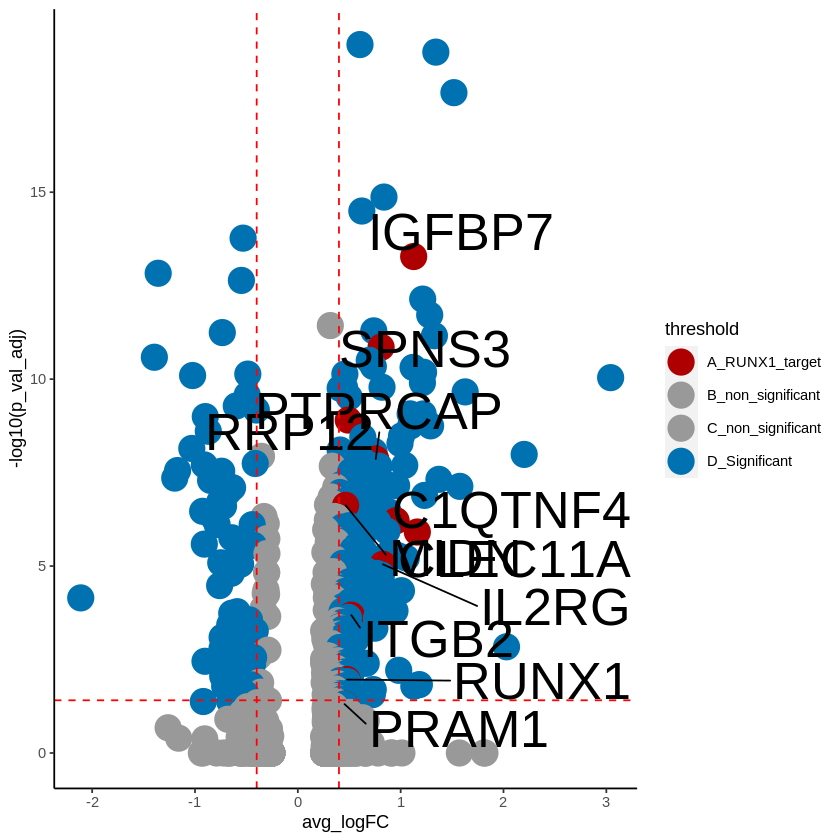

In [116]:
ggplot(markers) +
        geom_point(aes(x=avg_logFC, y=-log10(p_val_adj), colour=threshold), size = 7)+
scale_color_manual(values=c("#ae0000", '#999999','#999999', '#0072B2'))+
geom_text_repel(aes(x=avg_logFC, y=-log10(p_val_adj), 
                    label = ifelse(gene_label == TRUE, rownames(markers),"")), size = 11)+
geom_vline(xintercept = -0.4, linetype = "dashed", color = "red", size = 0.5)+
geom_vline(xintercept = 0.4, linetype = "dashed", color = "red", size = 0.5)+
geom_hline(yintercept = 1.41, linetype = "dashed", color = "red", size = 0.5)+
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(),
     axis.line = element_line(colour = "black"))


ggsave("volcano_plot.pdf", plot = last_plot(), device = NULL, path = NULL,width = 15, 
       height = 10,
  scale = 1)



***Plotting regulons and calculating p values***



In [ ]:
setwd("~/Desktop/bm_data/AUC_scores")
library(ggpubr)
library(dplyr)

###Erythroid
df<-read.csv("Erythroid_AUC.csv", row.names = 1)

a<-sapply(df[,2:length(colnames(df))], function(i) (t.test(i ~ df$Status, alt = "greater")$p.value))
a<-t(a)
a<-as.data.frame(t(a))
colnames(a)<-c("p_value")

erythroid_downs_up<-arrange(a, p_value)
erythroid_downs_up$p_val_adj<-sapply(erythroid_downs_up$p_value, function(i) i*112)
erythroid_downs_up<-erythroid_downs_up[erythroid_downs_up$p_val_adj<0.05,]
erythroid_downs_up$log_p_val_adj<-sapply(erythroid_downs_up$p_val_adj, function(i) abs(log(i)))
erythroid_downs_up$gene<-rownames(erythroid_downs_up)
erythroid_downs_up$Status<-"Downs"


a<-sapply(df[,2:length(colnames(df))], function(i) (t.test(i ~ df$Status, alt = "less")$p.value))
a<-t(a)
a<-as.data.frame(t(a))
colnames(a)<-c("p_value")

erythroid_healthy_up<-arrange(a, p_value)
erythroid_healthy_up$p_val_adj<-sapply(erythroid_healthy_up$p_value, function(i) i*112)
erythroid_healthy_up<-erythroid_healthy_up[erythroid_healthy_up$p_val_adj<0.05,]
erythroid_healthy_up$log_p_val_adj<-sapply(erythroid_healthy_up$p_val_adj, function(i) log(i))
erythroid_healthy_up$gene<-rownames(erythroid_healthy_up)
erythroid_healthy_up$Status<-"Non_Downs"

erythroid_DEGs<-rbind(head(erythroid_healthy_up,10), head(erythroid_downs_up, 10))
erythroid_DEGs <- erythroid_DEGs[order(erythroid_DEGs$log_p_val_adj), ]
erythroid_DEGs$gene <- factor(erythroid_DEGs$gene, levels = erythroid_DEGs$gene) 


p1<-ggplot(erythroid_DEGs, aes(x=gene, y=log_p_val_adj, label=log_p_val_adj)) + 
  geom_bar(stat='identity', aes(fill=Status), width=.5)  +
  scale_fill_manual(values = c("Non_Downs"="#c3dfe0", "Downs"="#ae0000"))+
  theme_bw() + coord_flip()+ theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ 
  labs(title= "Erythroid_regulons") 

###MEMP
df<-read.csv("MEMP_AUC.csv", row.names = 1)

a<-sapply(df[,2:113], function(i) (t.test(i ~ df$Status, alt = "greater")$p.value))
a<-t(a)
a<-as.data.frame(t(a))
colnames(a)<-c("p_value")
a<-na.omit(a)

MEMP_downs_up<-arrange(a, p_value)
MEMP_downs_up$p_val_adj<-sapply(MEMP_downs_up$p_value, function(i) i*112)
MEMP_downs_up<-MEMP_downs_up[MEMP_downs_up$p_val_adj<0.05,]
MEMP_downs_up$log_p_val_adj<-sapply(MEMP_downs_up$p_val_adj, function(i) abs(log(i)))
MEMP_downs_up$gene<-rownames(MEMP_downs_up)
MEMP_downs_up$Status<-"Downs"

a<-sapply(df[,2:length(colnames(df))], function(i) (t.test(i ~ df$Status, alt = "less")$p.value))
a<-t(a)
a<-as.data.frame(t(a))
colnames(a)<-c("p_value")
a<-na.omit(a)

MEMP_healthy_up<-arrange(a, p_value)
MEMP_healthy_up$p_val_adj<-sapply(MEMP_healthy_up$p_value, function(i) i*112)
MEMP_healthy_up<-MEMP_healthy_up[MEMP_healthy_up$p_val_adj<0.05,]
MEMP_healthy_up$log_p_val_adj<-sapply(MEMP_healthy_up$p_val_adj, function(i) log(i))
MEMP_healthy_up$gene<-rownames(MEMP_healthy_up)
MEMP_healthy_up$Status<-"Non_Downs"


MEMP_DEGs<-rbind(MEMP_healthy_up, head(MEMP_downs_up, 11))
MEMP_DEGs <- MEMP_DEGs[order(MEMP_DEGs$log_p_val_adj), ]
MEMP_DEGs$gene <- factor(MEMP_DEGs$gene, levels = MEMP_DEGs$gene) 


p2<-ggplot(MEMP_DEGs, aes(x=gene, y=log_p_val_adj, label=log_p_val_adj)) + 
  geom_bar(stat='identity', aes(fill=Status), width=.5)  +
  scale_fill_manual(values = c("Non_Downs"="#c3dfe0", "Downs"="#ae0000"))+
  theme_bw() + coord_flip()+ theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ 
  labs(title= "MEMP_regulons") 

###MK
df<-read.csv("MK_AUC.csv", row.names = 1)

a<-sapply(df[,2:113], function(i) (t.test(i ~ df$Status, alt = "greater")$p.value))
a<-t(a)
a<-as.data.frame(t(a))
colnames(a)<-c("p_value")

MK_downs_up<-arrange(a, p_value)
MK_downs_up$p_val_adj<-sapply(MK_downs_up$p_value, function(i) i*112)
MK_downs_up<-MK_downs_up[MK_downs_up$p_val_adj<0.05,]
MK_downs_up$log_p_val_adj<-sapply(MK_downs_up$p_val_adj, function(i) abs(log(i)))
MK_downs_up$gene<-rownames(MK_downs_up)
MK_downs_up$Status<-"Downs"

a<-sapply(df[,2:length(colnames(df))], function(i) (t.test(i ~ df$Status, alt = "less")$p.value))
a<-t(a)
a<-as.data.frame(t(a))
colnames(a)<-c("p_value")

MK_healthy_up<-arrange(a, p_value)
MK_healthy_up$p_val_adj<-sapply(MK_healthy_up$p_value, function(i) i*112)
MK_healthy_up<-MK_healthy_up[MK_healthy_up$p_val_adj<0.05,]
MK_healthy_up$log_p_val_adj<-sapply(MK_healthy_up$p_val_adj, function(i) log(i))
MK_healthy_up$gene<-rownames(MK_healthy_up)
MK_healthy_up$Status<-"Non_Downs"

MK_DEGs<-rbind(head(MK_healthy_up,10), head(MK_downs_up, 10))

MK_DEGs <- MK_DEGs[order(MK_DEGs$log_p_val_adj), ]
MK_DEGs$gene <- factor(MK_DEGs$gene, levels = MK_DEGs$gene) 


p3<-ggplot(MK_DEGs, aes(x=gene, y=log_p_val_adj, label=log_p_val_adj)) + 
  geom_bar(stat='identity', aes(fill=Status), width=.5)  +
  scale_fill_manual(values = c("Non_Downs"="#c3dfe0", "Downs"="#ae0000"))+
  theme_bw() + coord_flip()+ theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ 
  labs(title= "MK_regulons") 

###HSC

df<-read.csv("HSC_AUC.csv", row.names = 1)

a<-sapply(df[,2:113], function(i) (t.test(i ~ df$Status, alt = "greater")$p.value))
a<-t(a)
a<-as.data.frame(t(a))
colnames(a)<-c("p_value")

HSC_downs_up<-arrange(a, p_value)
HSC_downs_up$p_val_adj<-sapply(HSC_downs_up$p_value, function(i) i*112)
HSC_downs_up<-HSC_downs_up[HSC_downs_up$p_val_adj<0.05,]
HSC_downs_up$log_p_val_adj<-sapply(HSC_downs_up$p_val_adj, function(i) abs(log(i)))
HSC_downs_up$gene<-rownames(HSC_downs_up)
HSC_downs_up$Status<-"Downs"

a<-sapply(df[,2:length(colnames(df))], function(i) (t.test(i ~ df$Status, alt = "less")$p.value))
a<-t(a)
a<-as.data.frame(t(a))
colnames(a)<-c("p_value")

HSC_healthy_up<-arrange(a, p_value)
HSC_healthy_up$p_val_adj<-sapply(HSC_healthy_up$p_value, function(i) i*112)
HSC_healthy_up<-HSC_healthy_up[HSC_healthy_up$p_val_adj<0.05,]
HSC_healthy_up$log_p_val_adj<-sapply(HSC_healthy_up$p_val_adj, function(i) log(i))
HSC_healthy_up$gene<-rownames(HSC_healthy_up)
HSC_healthy_up$Status<-"Non_Downs"


HSC_DEGs<-rbind(HSC_healthy_up, HSC_downs_up)

HSC_DEGs <- HSC_DEGs[order(HSC_DEGs$log_p_val_adj), ]
HSC_DEGs$gene <- factor(HSC_DEGs$gene, levels = HSC_DEGs$gene) 


p4<-ggplot(HSC_DEGs, aes(x=gene, y=log_p_val_adj, label=log_p_val_adj)) + 
  geom_bar(stat='identity', aes(fill=Status), width=.5)  +
  scale_fill_manual(values = c("Non_Downs"="#c3dfe0", "Downs"="#ae0000"))+
  theme_bw() + coord_flip()+ theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ 
  labs(title= "HSC_regulons") 


###Monocyte

df<-read.csv("Monocyte_AUC.csv", row.names = 1)

a<-sapply(df[,2:113], function(i) (t.test(i ~ df$Status, alt = "greater")$p.value))
a<-t(a)
a<-as.data.frame(t(a))
colnames(a)<-c("p_value")

Monocyte_downs_up<-arrange(a, p_value)
Monocyte_downs_up$p_val_adj<-sapply(Monocyte_downs_up$p_value, function(i) i*112)
Monocyte_downs_up<-Monocyte_downs_up[Monocyte_downs_up$p_val_adj<0.05,]
Monocyte_downs_up$log_p_val_adj<-sapply(Monocyte_downs_up$p_val_adj, function(i) abs(log(i)))
Monocyte_downs_up$gene<-rownames(Monocyte_downs_up)
Monocyte_downs_up$Status<-"Downs"

a<-sapply(df[,2:length(colnames(df))], function(i) (t.test(i ~ df$Status, alt = "less")$p.value))
a<-t(a)
a<-as.data.frame(t(a))
colnames(a)<-c("p_value")

Monocyte_healthy_up<-arrange(a, p_value)
Monocyte_healthy_up$p_val_adj<-sapply(Monocyte_healthy_up$p_value, function(i) i*112)
Monocyte_healthy_up<-Monocyte_healthy_up[Monocyte_healthy_up$p_val_adj<0.05,]
Monocyte_healthy_up$log_p_val_adj<-sapply(Monocyte_healthy_up$p_val_adj, function(i) log(i))
Monocyte_healthy_up$gene<-rownames(Monocyte_healthy_up)
Monocyte_healthy_up$Status<-"Non_Downs"


Monocyte_DEGs<-rbind(Monocyte_healthy_up, Monocyte_downs_up)

Monocyte_DEGs <- Monocyte_DEGs[order(Monocyte_DEGs$log_p_val_adj), ]
Monocyte_DEGs$gene <- factor(Monocyte_DEGs$gene, levels = Monocyte_DEGs$gene) 


p5<-ggplot(Monocyte_DEGs, aes(x=gene, y=log_p_val_adj, label=log_p_val_adj)) + 
  geom_bar(stat='identity', aes(fill=Status), width=.5)  +
  scale_fill_manual(values = c("Non_Downs"="#c3dfe0", "Downs"="#ae0000"))+
  theme_bw() + coord_flip()+ theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ 
  labs(title= "Monocyte_regulons") 



###Myeloid precursor

df<-read.csv("Myeloid_precursor_AUC.csv", row.names = 1)

a<-sapply(df[,2:113], function(i) (t.test(i ~ df$Status, alt = "greater")$p.value))
a<-t(a)
a<-as.data.frame(t(a))
colnames(a)<-c("p_value")

Myeloid_precursor_downs_up<-arrange(a, p_value)
Myeloid_precursor_downs_up$p_val_adj<-sapply(Myeloid_precursor_downs_up$p_value, function(i) i*112)
Myeloid_precursor_downs_up<-Myeloid_precursor_downs_up[Myeloid_precursor_downs_up$p_val_adj<0.05,]
Myeloid_precursor_downs_up$log_p_val_adj<-sapply(Myeloid_precursor_downs_up$p_val_adj, function(i) abs(log(i)))
Myeloid_precursor_downs_up$gene<-rownames(Myeloid_precursor_downs_up)
Myeloid_precursor_downs_up$Status<-"Downs"

a<-sapply(df[,2:length(colnames(df))], function(i) (t.test(i ~ df$Status, alt = "less")$p.value))
a<-t(a)
a<-as.data.frame(t(a))
colnames(a)<-c("p_value")

Myeloid_precursor_healthy_up<-arrange(a, p_value)
Myeloid_precursor_healthy_up$p_val_adj<-sapply(Myeloid_precursor_healthy_up$p_value, function(i) i*112)
Myeloid_precursor_healthy_up<-Myeloid_precursor_healthy_up[Myeloid_precursor_healthy_up$p_val_adj<0.05,]
Myeloid_precursor_healthy_up$log_p_val_adj<-sapply(Myeloid_precursor_healthy_up$p_val_adj, function(i) log(i))
Myeloid_precursor_healthy_up$gene<-rownames(Myeloid_precursor_healthy_up)
Myeloid_precursor_healthy_up$Status<-"Non_Downs"


Myeloid_precursor_DEGs<-rbind(Myeloid_precursor_healthy_up, Myeloid_precursor_downs_up)

Myeloid_precursor_DEGs <- Myeloid_precursor_DEGs[order(Myeloid_precursor_DEGs$log_p_val_adj), ]
Myeloid_precursor_DEGs$gene <- factor(Myeloid_precursor_DEGs$gene, levels = Myeloid_precursor_DEGs$gene) 


p6<-ggplot(Myeloid_precursor_DEGs, aes(x=gene, y=log_p_val_adj, label=log_p_val_adj)) + 
  geom_bar(stat='identity', aes(fill=Status), width=.5)  +
  scale_fill_manual(values = c("Non_Downs"="#c3dfe0", "Downs"="#ae0000"))+
  theme_bw() + coord_flip()+ theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ 
  labs(title= "Myeloid_precursor_regulons") 


###Myeloid precursor

df<-read.csv("Myeloid_DC_AUC.csv", row.names = 1)

a<-sapply(df[,2:113], function(i) (t.test(i ~ df$Status, alt = "greater")$p.value))
a<-t(a)
a<-as.data.frame(t(a))
colnames(a)<-c("p_value")

Myeloid_DC_downs_up<-arrange(a, p_value)
Myeloid_DC_downs_up$p_val_adj<-sapply(Myeloid_DC_downs_up$p_value, function(i) i*112)
Myeloid_DC_downs_up<-Myeloid_DC_downs_up[Myeloid_DC_downs_up$p_val_adj<0.05,]
Myeloid_DC_downs_up$log_p_val_adj<-sapply(Myeloid_DC_downs_up$p_val_adj, function(i) abs(log(i)))
Myeloid_DC_downs_up$gene<-rownames(Myeloid_DC_downs_up)
Myeloid_DC_downs_up$Status<-"Downs"

a<-sapply(df[,2:length(colnames(df))], function(i) (t.test(i ~ df$Status, alt = "less")$p.value))
a<-t(a)
a<-as.data.frame(t(a))
colnames(a)<-c("p_value")

Myeloid_DC_healthy_up<-arrange(a, p_value)
Myeloid_DC_healthy_up$p_val_adj<-sapply(Myeloid_DC_healthy_up$p_value, function(i) i*112)
Myeloid_DC_healthy_up<-Myeloid_DC_healthy_up[Myeloid_DC_healthy_up$p_val_adj<0.05,]
Myeloid_DC_healthy_up$log_p_val_adj<-sapply(Myeloid_DC_healthy_up$p_val_adj, function(i) log(i))
Myeloid_DC_healthy_up$gene<-rownames(Myeloid_DC_healthy_up)
Myeloid_DC_healthy_up$Status<-"Non_Downs"


Myeloid_DC_DEGs<-rbind(Myeloid_DC_healthy_up, Myeloid_DC_downs_up)

Myeloid_DC_DEGs <- Myeloid_DC_DEGs[order(Myeloid_DC_DEGs$log_p_val_adj), ]
Myeloid_DC_DEGs$gene <- factor(Myeloid_DC_DEGs$gene, levels = Myeloid_DC_DEGs$gene) 


p7<-ggplot(Myeloid_DC_DEGs, aes(x=gene, y=log_p_val_adj, label=log_p_val_adj)) + 
  geom_bar(stat='identity', aes(fill=Status), width=.5)  +
  scale_fill_manual(values = c("Non_Downs"="#c3dfe0", "Downs"="#ae0000"))+
  theme_bw() + coord_flip()+ theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ 
  labs(title= "Myeloid_DC_regulons") 

ggarrange(p4, p2, p1, p3)

ggsave("regulons.pdf", plot = last_plot(), device = NULL, path = NULL,
  scale = 1, dpi = 300)

ggsave("HSC_regulons.pdf", plot = p4, device = NULL, path = NULL,
  scale = 1, dpi = 300)
ggsave("MEMP_regulons.pdf", plot = p2, device = NULL, path = NULL,
  scale = 1, dpi = 300)
ggsave("Erythoid_regulons.pdf", plot = p1, device = NULL, path = NULL,
  scale = 1, dpi = 300)
ggsave("MK_regulons.pdf", plot = p3, device = NULL, path = NULL,
  scale = 1, dpi = 300)